In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os


In [2]:
#load assesment file
amzn = "resources/HistoricalData_amzn.csv"
amzn_df = pd.read_csv(amzn)
amzn_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/24/2021,$3244.99,2422813,$3215.5,$3257.95,$3210.4993
1,05/21/2021,$3203.08,4104882,$3250,$3256.6946,$3197.01
2,05/20/2021,$3247.68,2633192,$3244.4042,$3259.6799,$3236.18
3,05/19/2021,$3231.8,2679708,$3195,$3234.75,$3184
4,05/18/2021,$3232.28,2828391,$3292.575,$3312,$3230.37


In [3]:
amzn_df['Date']= pd.to_datetime(amzn_df['Date'])
amzn_df['Close/Last'] = amzn_df['Close/Last'].str.replace('$','')
amzn_df['Open'] = amzn_df['Open'].str.replace('$','')
amzn_df['High'] = amzn_df['High'].str.replace('$','')
amzn_df['Low'] = amzn_df['Low'].str.replace('$','')
amzn_df = amzn_df.apply( pd.to_numeric)

In [4]:
amzn_df['Date']= pd.to_datetime(amzn_df['Date'])
amzn_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,3244.99,2422813,3215.5000,3257.9500,3210.4993
1,2021-05-21,3203.08,4104882,3250.0000,3256.6946,3197.0100
2,2021-05-20,3247.68,2633192,3244.4042,3259.6799,3236.1800
3,2021-05-19,3231.80,2679708,3195.0000,3234.7500,3184.0000
4,2021-05-18,3232.28,2828391,3292.5750,3312.0000,3230.3700


In [5]:
#setup datetime
start_date = "2016-05-24"
end_date = "2020-05-24"

after_start_date = amzn_df["Date"] >= start_date
before_end_date = amzn_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
amzn_df_4 = amzn_df.loc[between_two_dates]
amzn_df_4.head()

,Date,Close/Last,Volume,Open,High,Low
252,2020-05-22,2436.88,2867079,2455.010,2469.850,2430.13
253,2020-05-21,2446.74,5114403,2500.000,2525.450,2442.54
254,2020-05-20,2497.94,3998143,2477.870,2500.010,2467.27
255,2020-05-19,2449.33,4320498,2429.830,2484.995,2428.97
256,2020-05-18,2426.26,4366572,2404.346,2433.000,2384.01


No handles with labels found to put in legend.


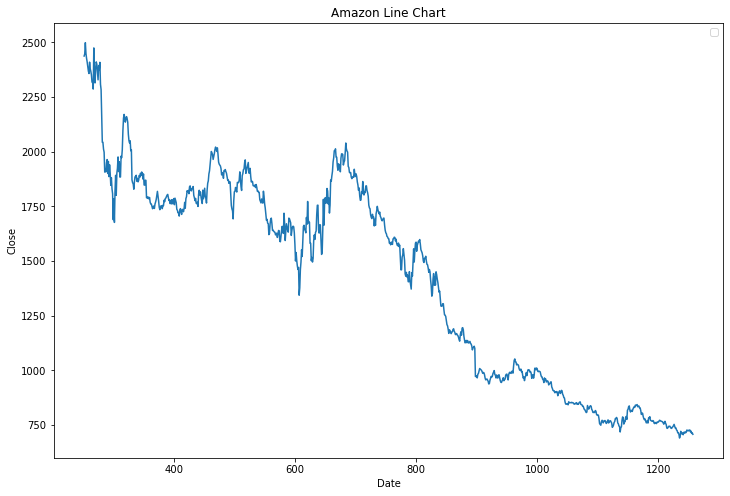

In [19]:
plt.figure(figsize=(12,8))
plt.plot(amzn_df_4['Close/Last'])
plt.title("Amazon Line Chart")
plt.legend(loc='best')
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

In [20]:
amzn_df_4.shape

(1006, 6)

In [21]:
import tensorflow as tf
from tensorflow import keras

In [22]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [23]:
X = np.array(amzn_df_4['High'], dtype = float) # Feature
y = np.array(amzn_df_4['Date'], dtype = float) # Target

In [17]:
model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 968us/step - loss: nan                                  
Epoch 2/100
32/32 [==============================] - 0s 903us/step - loss: nan
Epoch 3/100
32/32 [==============================] - 0s 871us/step - loss: nan
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/100
32/32 [==============================] - 0s 968us/step - loss: nan
Epoch 6/100
32/32 [==============================] - 0s 807us/step - loss: nan
Epoch 7/100
32/32 [==============================] - 0s 968us/step - loss: nan
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/100
32/32 [==============================] - 0s 935us/step - loss: nan
Epoch 10/100
32/32 [==============================] - 0s 968us/step - loss: nan
Epoch 11/100
32/32 [==============================] - 0s 871us/step - loss: nan
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/100
32/32 [=